In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

480.0
160.0
29912


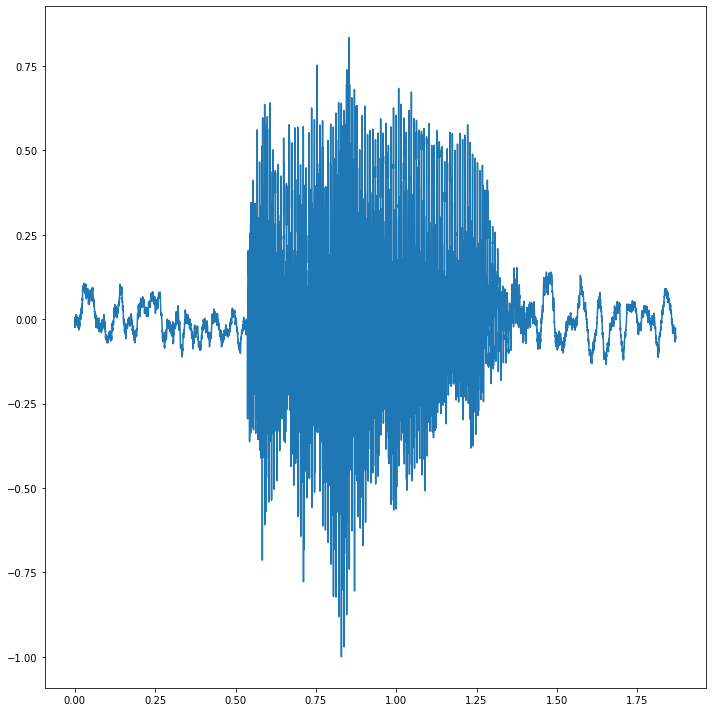

29912
29912


In [22]:
fs,audio = wav.read('a_16_1.wav')
time = np.arange(len(audio))/fs
audio_normalised = audio/np.max(np.abs(audio))
frame_size = 30   #ms
hop_size = 10     #ms
# window_type = np.hamming()
window_size = frame_size*fs/1000 #512
window_hop_size = hop_size*fs/1000 
window_type = np.hamming(window_size)

print(window_size)
print(window_hop_size)
print(audio_normalised.shape[0])

plt.plot(time , audio_normalised)
plt.show()


#Computing The Short_Term_Energy
STE =[] #short term energy
for i in range(0,audio_normalised.shape[0],int(window_hop_size)):
    x = audio_normalised[i:i+int(window_hop_size)]**2
    sum_x = np.sum(x)
    STE.append(sum_x)
STE = np.array(STE,dtype=object) 

# print(type(STE))
# print(STE)

print(len(audio_normalised))
print(len(time))

################################################################################


# Computing the Short term Energy in the Frequency Domain --> Just Trying Out Parseval's Theorem
STE_freq = []
for i in range(0,audio_normalised.shape[0],int(window_hop_size)):
    audio_fft = np.fft.fft(audio_normalised[i:i+int(window_hop_size)]**2)
    sum_audio_fft = np.sum(audio_fft)
    STE_freq.append(sum_audio_fft)
STE_freq = np.array(STE_freq,dtype=object)

# x = (1/2*np.pi)
# plt.plot(x*STE_freq)


################################################################################



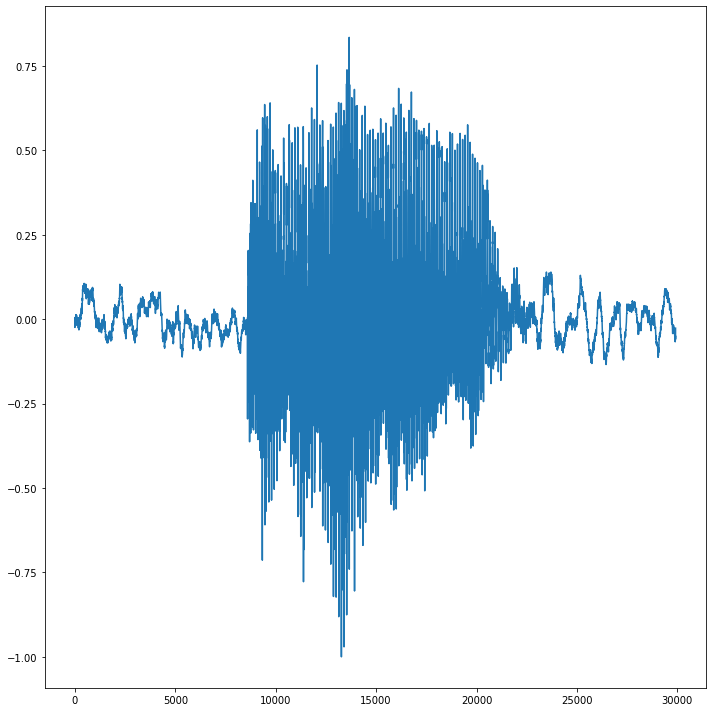

In [23]:
plt.plot(audio_normalised)


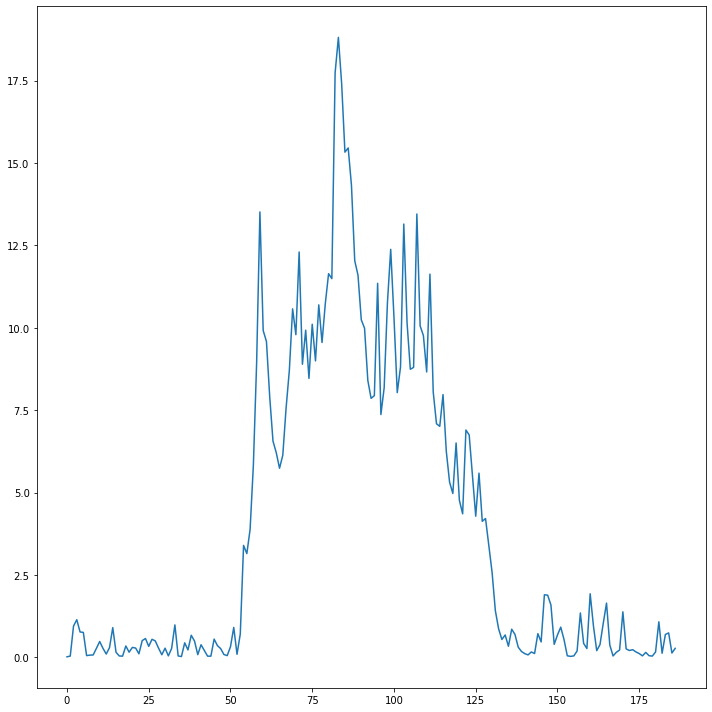

In [24]:
plt.plot(STE)

In [26]:
# Estimating the Zero Crossing Rate of the Signal
import librosa
# We are taking a small frame---> Calculating the ZCR of that Portion --> then we are appending the matrix

frame_size = 30   #ms
hop_size = 10     #ms
# window_type = np.hamming()
window_size = int(frame_size*fs/1000) #512
window_hop_size = int(hop_size*fs/1000) 
window_type = np.hamming(window_size)

# ZCR = []
# for i in range(0,audio_normalised.shape[0],int(window_hop_size)):
#     x = audio_normalised[i:i+int(window_hop_size)]
#      # Need to write a logic for ZCR
#     ZCR.append()#Append the Value to the list if needed)
# ZCR = np.array(ZCR)


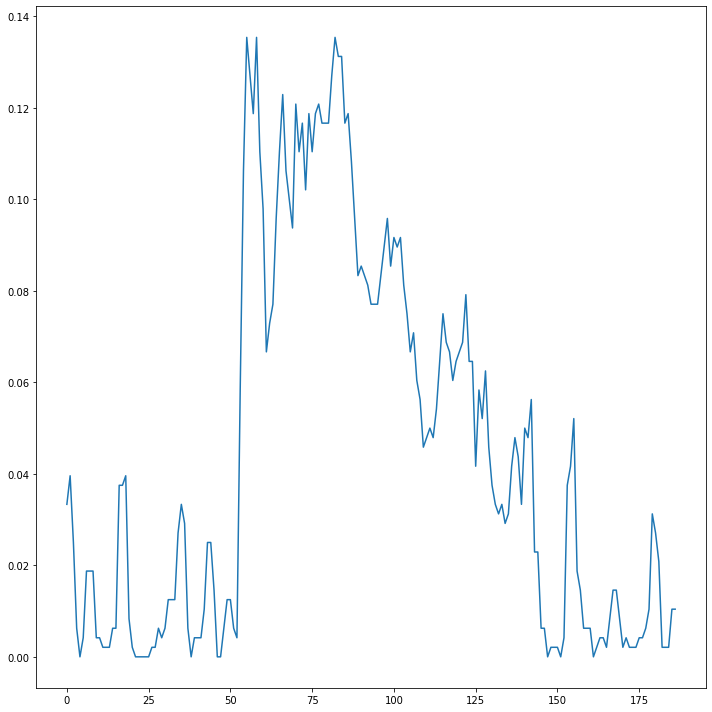

In [27]:
# Using Librosa to find the Zero Crossing Rate
ZCR = librosa.feature.zero_crossing_rate(audio_normalised,frame_length=window_size,hop_length=window_hop_size,center = 'True')

plt.plot(np.fft.rfft(ZCR.T))

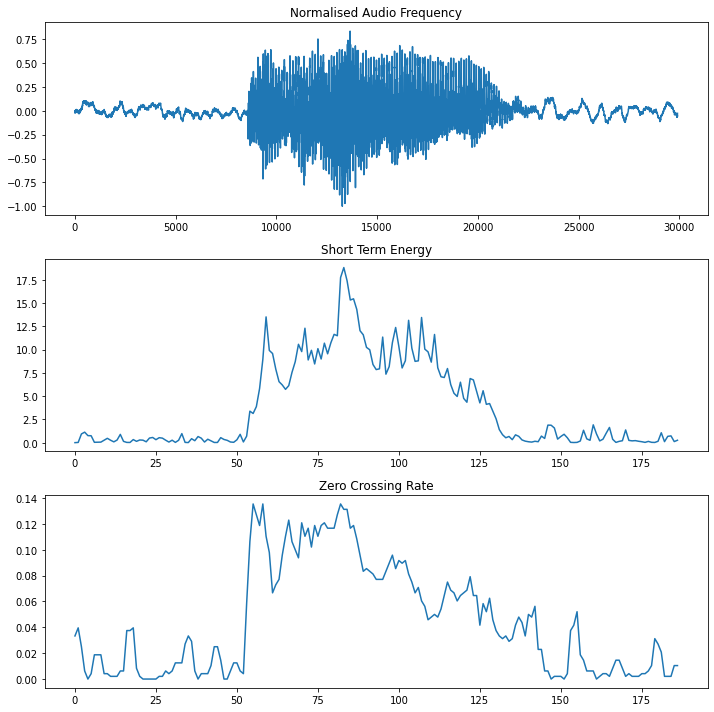

In [28]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(311)
plt.plot(audio_normalised)
plt.title('Normalised Audio Frequency')
plt.subplot(312)
plt.plot(STE)
plt.title('Short Term Energy')
plt.subplot(313)
plt.plot(np.fft.rfft(ZCR.T))
plt.title('Zero Crossing Rate')

plt.show()

Text(0.5, 1.0, 'Voice Activity Detection Using STE')

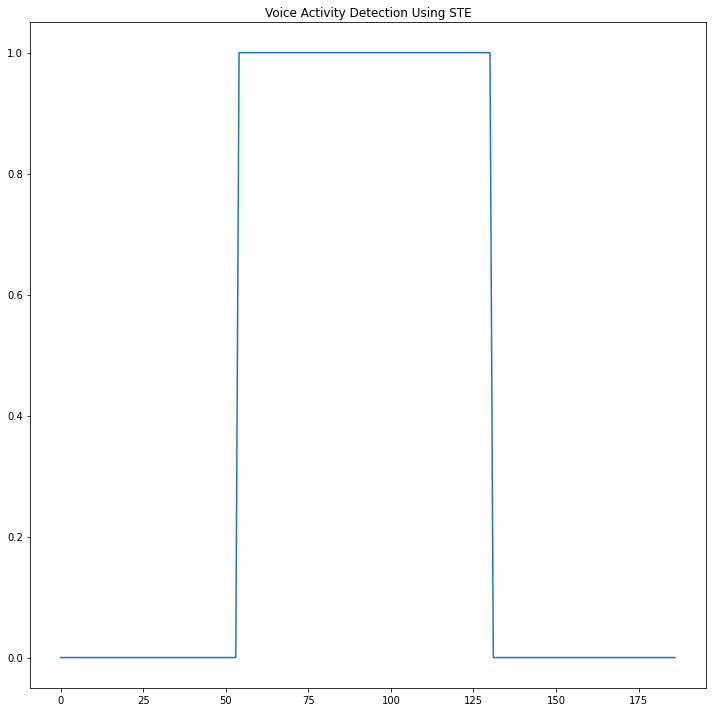

In [29]:
# VAD Based on STE 
# Approach --> If the STE is above a threshold level then --> it should be 1 else ---> 0

# defining the parameters 

Threshold = 2.5

vad = np.array(STE) >= Threshold

plt.plot(vad)
plt.title('Voice Activity Detection Using STE')

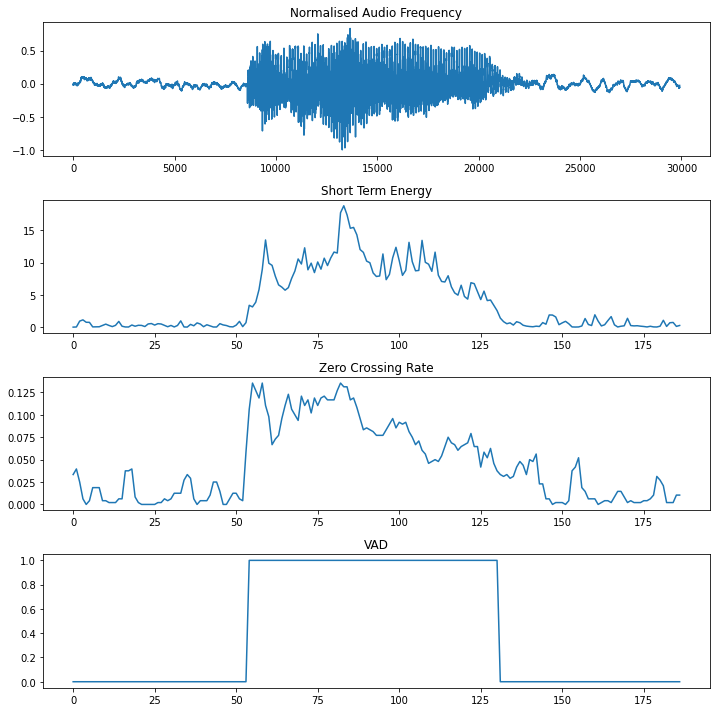

In [30]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(411)
plt.plot(audio_normalised)
plt.title('Normalised Audio Frequency')
plt.subplot(412)
plt.plot(STE)
plt.title('Short Term Energy')
plt.subplot(413)
plt.plot(np.fft.rfft(ZCR.T))
plt.title('Zero Crossing Rate')
plt.subplot(414)
plt.plot(vad)
plt.title('VAD')
plt.show()